In [96]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

######## DO NOT MODIFY THIS FUNCTION ########
def draw_rand_label(x, label_list):
    seed = abs(np.sum(x))
    while seed < 1:
        seed = 10 * seed
    seed = int(1000000 * seed)
    np.random.seed(seed)
    return np.random.choice(label_list)
#############################################

In [563]:
class Q1:

    def feature_means(self, iris):
        iris = iris[:, 0:4]
        return np.mean(iris, axis=0)

    def covariance_matrix(self, iris):
        return np.cov(iris[:, 0:4], rowvar=False)

    def feature_means_class_1(self, iris):
        iris = iris[iris[:,4] == 1]
        iris = iris[:, 0:4]
        return np.mean(iris, axis=0)

    def covariance_matrix_class_1(self, iris):
        iris = iris[iris[:,4] == 1]
        return np.cov(iris[:, 0:4], rowvar=False)

    
def euclidian_dist(x, Y):
    return (np.sum((np.abs(x - Y)) ** 2, axis=1)) ** (0.5)
 
    
class HardParzen:
    def __init__(self, h):
        self.h = h

    def train(self, train_inputs, train_labels):
        self.label_list = np.unique(train_labels)
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        self.n_classes = len(np.unique(train_labels))

    def compute_predictions(self, test_data):
        # Initialization of the count matrix and the predicted classes array
        num_test = test_data.shape[0]
        counts = np.ones((num_test, self.n_classes))
        classes_pred = np.zeros(num_test)
        
        # For each test datapoint
        for (i, ex) in enumerate(test_data):
            # Find the distances to each training set point using dist_func
            distances = euclidian_dist(ex, self.train_inputs)

            # Go through the training set to find the neighbors of the current point (ex)
            ind_neighbors = []
            radius = self.h   
            ind_neighbors = np.array([j for j in range(len(distances)) if distances[j] < radius])
            
            print(len(ind_neighbors))
            
            if len(ind_neighbors) == 0:
                classes_pred[i] = draw_rand_label(ex, self.label_list)
            else:
                # Calculate the number of neighbors belonging to each class and write them in counts[i,:]
                cl_neighbors = list(self.train_labels[ind_neighbors] - 1)
                cl_neighbors = np.array(cl_neighbors).astype('int')
            
                for j in range(min(len(cl_neighbors), self.train_inputs.shape[0])):
                    counts[i, cl_neighbors[j]] += 1

                # From the counts matrix, define classes_pred[i] (don't forget that classes are labeled from 1 to n)
                classes_pred[i] = np.argmax(counts[i, :]) + 1.

        return classes_pred

In [564]:
class SoftRBFParzen:
    def __init__(self, sigma):
        self.sigma  = sigma

    def train(self, train_inputs, train_labels):
        self.label_list = np.unique(train_labels)
        self.train_inputs = train_inputs
        self.train_labels = train_labels
        self.n_classes = len(np.unique(train_labels))

    def compute_predictions(self, test_data):
        # Initialization of the count matrix and the predicted classes array
        num_test = test_data.shape[0]
        classes_pred = np.zeros(num_test)
        
        # one hot encode the training labels
        onehot = np.zeros((self.train_inputs.shape[0], self.n_classes))
        onehot[np.arange(self.train_inputs.shape[0]), (self.train_labels-1).astype('int')] = 1
    
        # For each test datapoint
        for (i, ex) in enumerate(test_data):
            # Find the distances to each training set point using dist_func
            distances = euclidian_dist(ex, self.train_inputs)
            
            expo = (-0.5*(distances**2)) / (self.sigma**2)
            
            kernel = np.longdouble(np.exp(expo)) / (((2*math.pi)**(self.train_inputs.shape[1] / 2)) * (self.sigma**self.train_inputs.shape[1]))
            probas = onehot.copy()
            
            for j in range(self.train_inputs.shape[0]):
                probas[j, :] *= kernel[j]
                
            probas = np.sum(probas, axis=0)
            #probas = probas / np.sum(kernel)
            print(probas)
    
            # From the counts matrix, define classes_pred[i] (don't forget that classes are labeled from 1 to n)
            classes_pred[i] = np.argmax(probas) + 1.
            
        return classes_pred

In [587]:
test_error.soft_parzen(20)

[4.74607080e-06 4.67828473e-06 4.60196434e-06]
[4.74385769e-06 4.67173431e-06 4.59223576e-06]
[4.74285780e-06 4.65745518e-06 4.57263480e-06]
[4.74370321e-06 4.69230875e-06 4.62885096e-06]
[4.74682149e-06 4.69424904e-06 4.62702039e-06]
[4.74752168e-06 4.68144037e-06 4.60856052e-06]
[4.74278300e-06 4.67470433e-06 4.60583201e-06]
[4.74431992e-06 4.66810451e-06 4.58746324e-06]
[4.74682147e-06 4.68949981e-06 4.62146019e-06]
[4.74678633e-06 4.68317441e-06 4.61307812e-06]
[4.69355081e-06 4.74177808e-06 4.71477320e-06]
[4.66591773e-06 4.74351423e-06 4.73471845e-06]
[4.66867722e-06 4.74491558e-06 4.73477574e-06]
[4.66616820e-06 4.74305624e-06 4.72995454e-06]
[4.67046309e-06 4.74486363e-06 4.73280815e-06]
[4.67587167e-06 4.74542485e-06 4.73244999e-06]
[4.64937009e-06 4.74178224e-06 4.73804386e-06]
[4.69623433e-06 4.74410811e-06 4.72087781e-06]
[4.71635346e-06 4.73077412e-06 4.68747388e-06]
[4.72384939e-06 4.72909901e-06 4.68345335e-06]
[4.62083284e-06 4.73456852e-06 4.74254991e-06]
[4.60080083e-

0.13333333333333333

In [416]:
np.longdouble(np.exp(-100))

3.720075976020836e-44

In [296]:
def split_dataset(iris):
    indices= list(range(iris.shape[0]))
    mod=[item % 5 for item in indices]

    indices_training = [i for i, x in enumerate(mod) if x <= 2]
    indices_validation = [i for i, x in enumerate(mod) if x == 3]
    indices_test = [i for i, x in enumerate(mod) if x == 4]
    
    train = iris[indices_training, :]
    validation = iris[indices_validation, :]
    test = iris[indices_test, :]
    
    return (train, validation, test)


class ErrorRate:
    def __init__(self, x_train, y_train, x_val, y_val):
        self.x_train = x_train
        self.y_train = y_train
        self.x_val = x_val
        self.y_val = y_val

    def hard_parzen(self, h):
        hp = HardParzen(h)
        hp.train(self.x_train, self.y_train)
        pred = hp.compute_predictions(self.x_val)
        
        missclassified = 0
        for (i, classe) in enumerate(pred):
            if classe != self.y_val[i]:
                missclassified += 1
        
        return (missclassified / self.y_val.shape[0])

    def soft_parzen(self, sigma):
        sp = SoftRBFParzen(sigma)
        sp.train(self.x_train, self.y_train)
        pred = sp.compute_predictions(self.x_val)
        
        missclassified = 0
        for (i, classe) in enumerate(pred):
            if classe != self.y_val[i]:
                missclassified += 1
        
        return (missclassified / self.y_val.shape[0])

In [299]:
def get_test_errors(iris):
    train, validation, test = split_dataset(iris)
    test_error = ErrorRate(train[:, 0:-1], train[:, -1], validation[:, 0:-1], validation[:, -1])
    
    min_hard = float("inf")
    min_soft = float("inf")
    h = 0
    sigma = 0
    
    for param in [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]:
        if test_error.hard_parzen(param) < min_hard:
            min_hard = test_error.hard_parzen(param)
            h = param
        
        if test_error.soft_parzen(param) < min_soft:
            min_soft = test_error.soft_parzen(param)
            sigma = param
            
    test_error_finale = ErrorRate(train[:, 0:-1], train[:, -1], test[:, 0:-1], test[:, -1])
    return [test_error_finale.hard_parzen(h), test_error_finale.soft_parzen(sigma)]


def random_projections(X, A):
    pass

In [512]:
train, validation, test = split_dataset(iris)

In [513]:
test_error = ErrorRate(train[:, 0:-1], train[:, -1], validation[:, 0:-1], validation[:, -1])

In [555]:
val = [0.001, 0.01, 0.1, 0.3, 1.0, 3.0, 10.0, 15.0, 20.0]
plot = np.zeros((len(val), 3))
plot[:,0] = val


for (i, h) in enumerate(val):
    plot[i,1] = test_error.hard_parzen(h)

for (i, sigma) in enumerate(val):
    plot[i,2] = test_error.soft_parzen(sigma)

plot

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[9.42306253e-38 0.00000000e+00 0.00000000e+00]
[1.80467629e-211 0.00000000e+000 0.00000000e+000]
[1.80467629e-211 0.00000000e+000 0.00000000e+000]
[3.48076911e-233 0.00000000e+000 0.00000000e+000]
[3.50545085e-81 0.00000000e+00 0.00000000e+00]
[1.88461251e-37 0.00000000e+00 0.00000000e+00]
[6.7135329e-255 0.0000000e+000 0.0000000e+000]
[3.50545085e-81 0.00000000e+00 0.00000000e+00]
[6.7611378e-103 0.0000000e+000 0.0000000e+000]
[4.88558044e-16 0.00000000e+00 0.00000000e+00]
[0.00000000e+000 9.35671512e-190 0.00000000e+000]
[0.00000000e+000 1.30405435e-124 0.00000000e+000]
[0.00000000e+00 9.42306253e-38 0.00000000e+00]
[0.00000000e+000 2.51519463e-146 0.00000000e

array([[1.00000000e-03, 7.33333333e-01, 6.66666667e-01],
       [1.00000000e-02, 7.33333333e-01, 1.66666667e-01],
       [1.00000000e-01, 7.33333333e-01, 6.66666667e-02],
       [3.00000000e-01, 2.33333333e-01, 3.33333333e-02],
       [1.00000000e+00, 1.00000000e-01, 1.33333333e-01],
       [3.00000000e+00, 3.00000000e-01, 1.33333333e-01],
       [1.00000000e+01, 6.66666667e-01, 1.33333333e-01],
       [1.50000000e+01, 6.66666667e-01, 1.33333333e-01],
       [2.00000000e+01, 6.66666667e-01, 1.33333333e-01]])

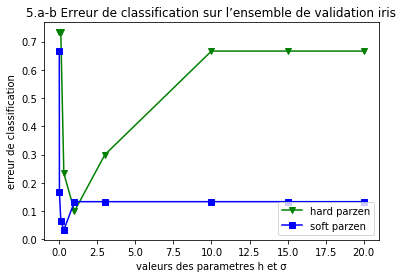

In [549]:
plt.plot(plot[:, 0], plot[:, 1], color='green', marker='v', label='hard parzen')
plt.plot(plot[:, 0], plot[:, 2], color='blue', marker='s', label='soft parzen')

plt.legend()
plt.title('5.a-b Erreur de classification sur l’ensemble de validation iris')
plt.xlabel('valeurs des parametres h et σ')
plt.ylabel('erreur de classification')
plt.show()

In [515]:
test_error.soft_parzen(0.02)

0.06666666666666667

In [446]:
get_test_errors(iris)

[0.0, 0.6666666666666666]

In [378]:
x_1 = np.array([1,1,2,1])

Y_1 = np.array([[1,1,2,1],
               [1,1,1,1],
               [1,1,2,0],
               [1,1,0,0]])

euclidian_dist(x_1, Y_1)

array([0.        , 1.        , 1.        , 2.23606798])

In [63]:

# Size of training set
n_train = 100
data = iris

# The index of the column containing the labels
target_ind = [data.shape[1] - 1]

# Comment to have random (non-deterministic) results
random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Split the data into both sets
train_set = data[train_inds, :]
#train_set = train_set[:, train_cols + target_ind]
test_set = data[test_inds, :]
#test_set = test_set[:, train_cols + target_ind]

# Separate the test set into inputs and labels
test_inputs = test_set[:, :-1]
test_labels = test_set[:, -1].astype('int32')
train_inputs = train_set[:, :-1]
train_labels = train_set[:, -1].astype('int32')

In [226]:
parzen = SoftRBFParzen(0.5)

parzen.train(train_inputs, train_labels)

parzen.compute_predictions(test_inputs)

array([3., 3., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])